In [1]:
import os
import sys
from pathlib import Path
rootFolder = str(Path(os.path.abspath('')).parent)
sys.path.append(rootFolder)

In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

%matplotlib inline
os.chdir(rootFolder)
mat = loadmat('sim/extracellular_stim_tools/TMSwaves.mat')

In [3]:
print(mat.keys())
# print(mat['Erec_b'])
Erec_b = mat['Erec_b']
print(Erec_b)
Erec_h = mat['Erec_h']
Erec_m = mat['Erec_m']
tb = mat['tb']
print(tb)
th = mat['th']
tm = mat['tm']

dict_keys(['__header__', '__version__', '__globals__', 'Erec_b', 'Erec_h', 'Erec_m', 'tb', 'th', 'tm'])
[[ 1.87833800e-03]
 [ 5.88362494e-03]
 [ 1.40945023e-02]
 ...
 [ 1.96112099e-04]
 [-4.15288878e-06]
 [ 0.00000000e+00]]
[[0.000e+00]
 [2.000e-04]
 [4.000e-04]
 ...
 [7.370e-01]
 [7.372e-01]
 [7.374e-01]]


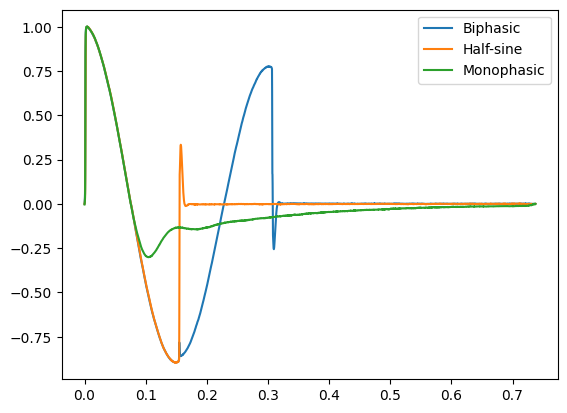

In [4]:
plt.plot(tb, Erec_b, th, Erec_h, tm, Erec_m)
plt.legend(['Biphasic', 'Half-sine', 'Monophasic'])

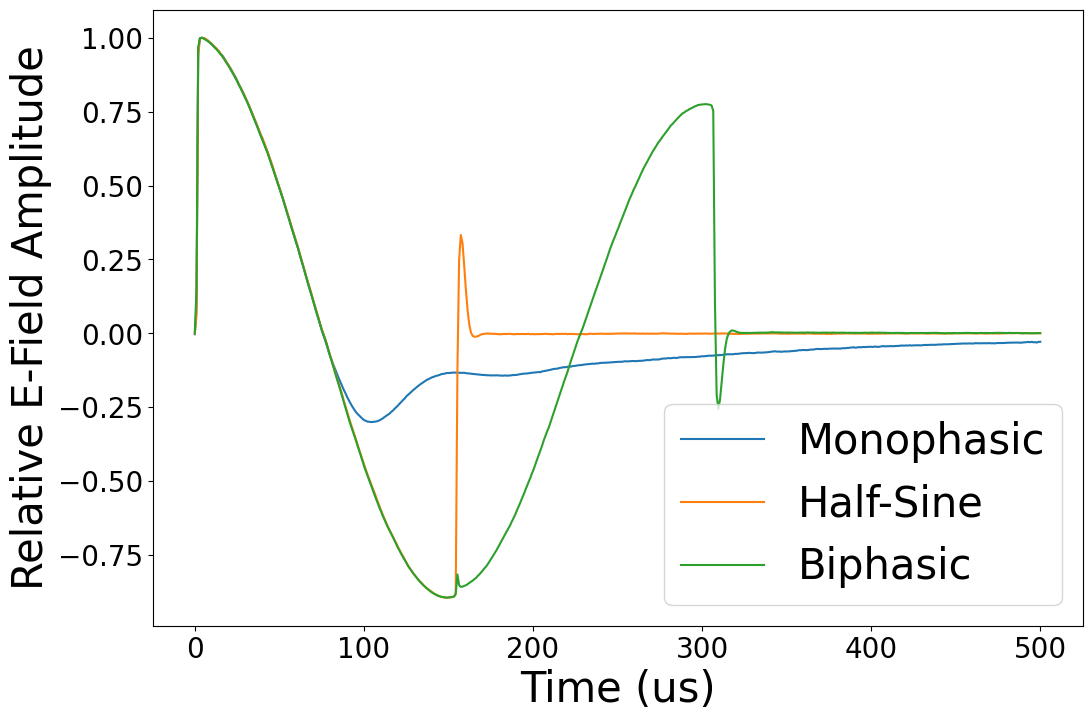

In [5]:
from sim.extracellular_stim_tools.extracellular_efield import coil_recording
import numpy as np

pulse_width_ms = 0.075
mrec = coil_recording('m', pulse_width_ms)
hrec = coil_recording('h', pulse_width_ms)
brec = coil_recording('b', pulse_width_ms)

t = np.linspace(0, 500e-3, 500)
plt.figure(figsize=(12, 8))
plt.plot(t*1e3, mrec(t), t*1e3, hrec(t), t*1e3, brec(t))
plt.xlabel("Time (us)", fontsize=30)
plt.xticks(fontsize=20)
plt.ylabel("Relative E-Field Amplitude", fontsize=30)
plt.yticks(fontsize=20)
plt.legend(['Monophasic', 'Half-Sine', 'Biphasic'], fontsize=30)